# IMPORTS 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,precision_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# DATA LOADING

In [2]:
iris=pd.read_csv("C:\\Users\\cathe\\Downloads\\Iris.csv")

# DATA EXPLORATION

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.sample(8)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
114,115,5.8,2.8,5.1,2.4,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
47,48,4.6,3.2,1.4,0.2,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
149,150,5.9,3.0,5.1,1.8,Iris-virginica
19,20,5.1,3.8,1.5,0.3,Iris-setosa


In [6]:
iris.shape

(150, 6)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [10]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
iris.max()

Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [12]:
iris.min()

Id                         1
SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [13]:
iris.mean()

C:\Users\cathe\AppData\Local\Temp/ipykernel_24024/935066809.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris.mean()


Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

In [14]:
iris.mode()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.0,3.0,1.5,0.2,Iris-setosa
1,2,NaN,NaN,NaN,NaN,Iris-versicolor
2,3,NaN,NaN,NaN,NaN,Iris-virginica
3,4,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
145,146,NaN,NaN,NaN,NaN,NaN
146,147,NaN,NaN,NaN,NaN,NaN
147,148,NaN,NaN,NaN,NaN,NaN
148,149,NaN,NaN,NaN,NaN,NaN


In [15]:
iris.median()

C:\Users\cathe\AppData\Local\Temp/ipykernel_24024/1297003277.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris.median()


Id               75.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [16]:
iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [17]:
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# DATA CLEANING-CHECKING FOR NULL VALUES

In [19]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# DATA VISUALIZATION

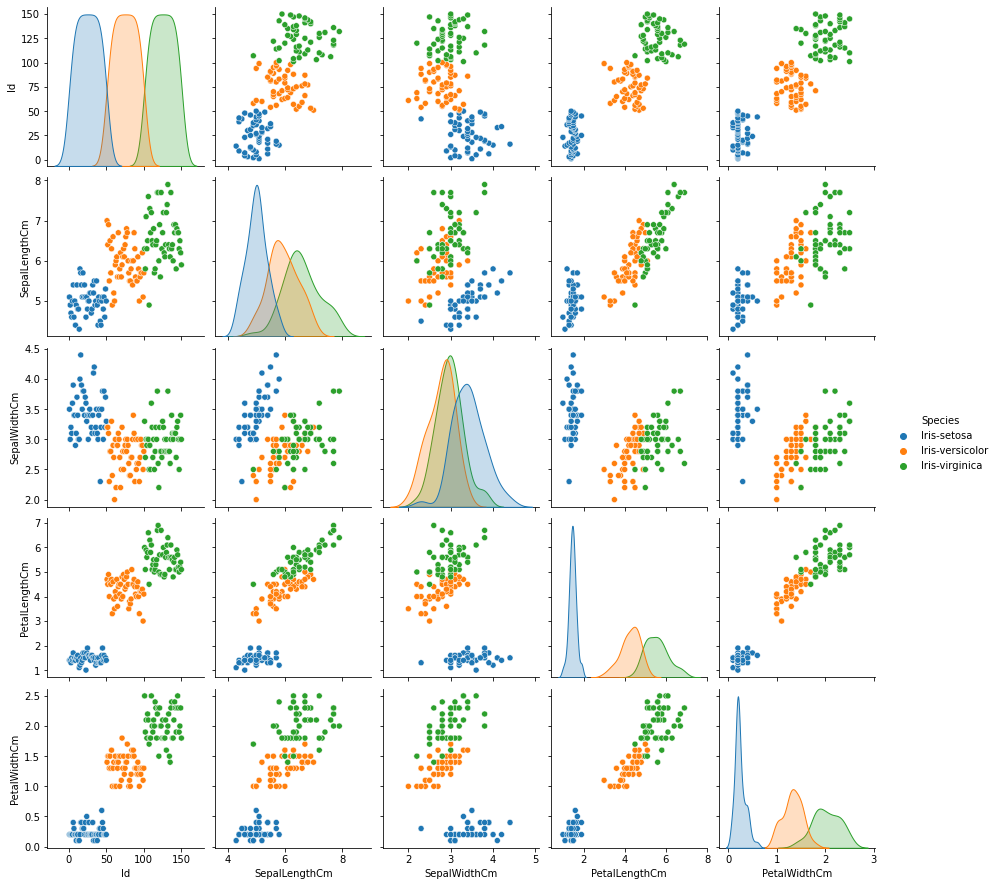

In [20]:
sns.pairplot(iris,hue="Species")
plt.show()

Text(0, 0.5, 'SepalLengthCm')

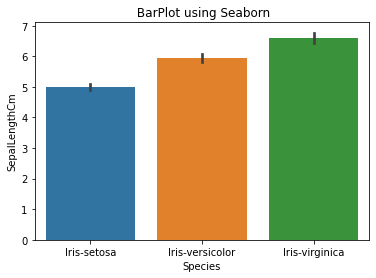

In [21]:
sns.barplot(x=iris['Species'],y=iris['SepalLengthCm'] )
plt.title(" BarPlot using Seaborn") 
plt.xlabel("Species") 
plt.ylabel("SepalLengthCm")

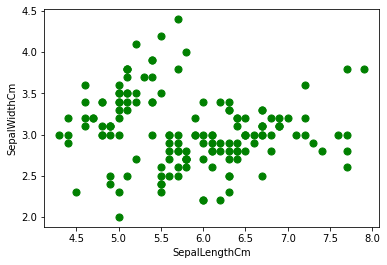

In [22]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm",color="green",s=50)
plt.show()

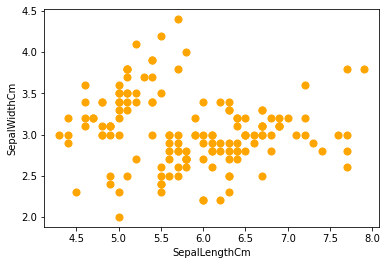

In [23]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm",color="orange",s=50 )
plt.show()

C:\Users\cathe\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


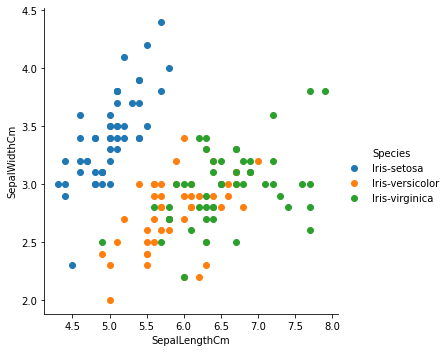

In [24]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

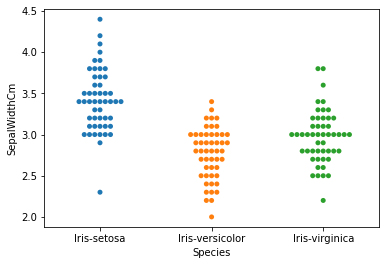

In [25]:
sns.swarmplot(x='Species',y='SepalWidthCm',data=iris)

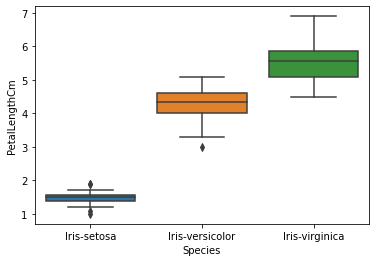

In [26]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris )
plt.show()

# ENCODING

In [27]:
label_encoder=LabelEncoder()
iris['Species_name'] = label_encoder.fit_transform(iris['Species'])

In [28]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_name
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


# CORRELATION

In [29]:
iris.corr(method="pearson")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_name
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species_name,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


In [30]:
iris.corr(method="kendall")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_name
Id,1.000000,0.525219,-0.272789,0.645258,0.679710,0.819232
SepalLengthCm,0.525219,1.000000,-0.072112,0.717624,0.654960,0.670444
SepalWidthCm,-0.272789,-0.072112,1.000000,-0.182391,-0.146988,-0.333435
PetalLengthCm,0.645258,0.717624,-0.182391,1.000000,0.803014,0.822949
PetalWidthCm,0.679710,0.654960,-0.146988,0.803014,1.000000,0.838757
Species_name,0.819232,0.670444,-0.333435,0.822949,0.838757,1.000000


In [31]:
iris.corr(method="spearman")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_name
Id,1.000000,0.734054,-0.411539,0.868498,0.879045,0.942830
SepalLengthCm,0.734054,1.000000,-0.159457,0.881386,0.834421,0.798078
SepalWidthCm,-0.411539,-0.159457,1.000000,-0.303421,-0.277511,-0.434348
PetalLengthCm,0.868498,0.881386,-0.303421,1.000000,0.936003,0.935441
PetalWidthCm,0.879045,0.834421,-0.277511,0.936003,1.000000,0.937850
Species_name,0.942830,0.798078,-0.434348,0.935441,0.937850,1.000000


# HEATMAP FOR CORRELATION

<AxesSubplot:>

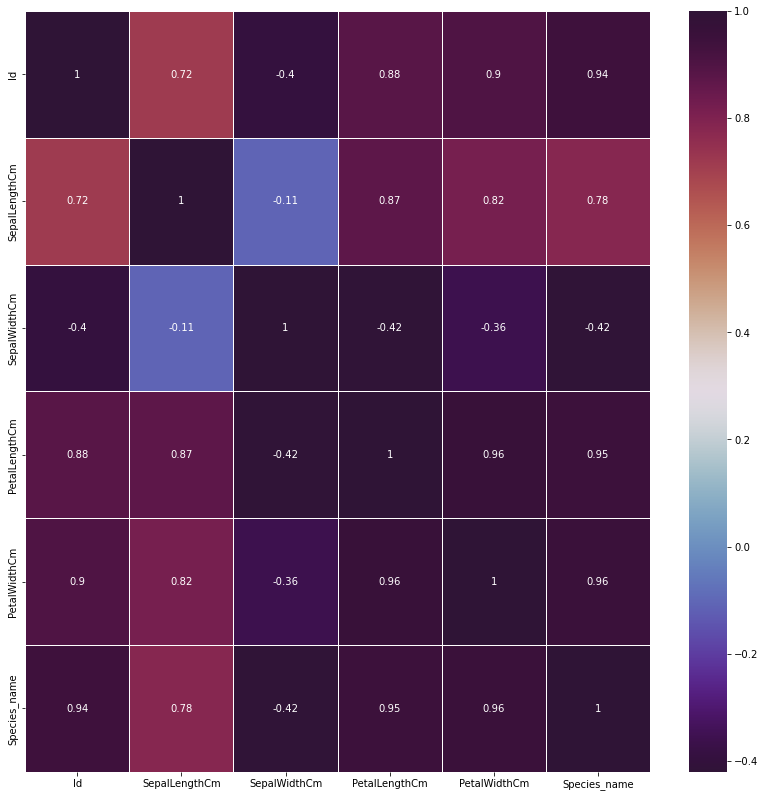

In [32]:
corr = iris.corr(method="pearson")
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, annot=True,linewidth=.5, ax=ax, cmap="twilight_shifted")


<AxesSubplot:>

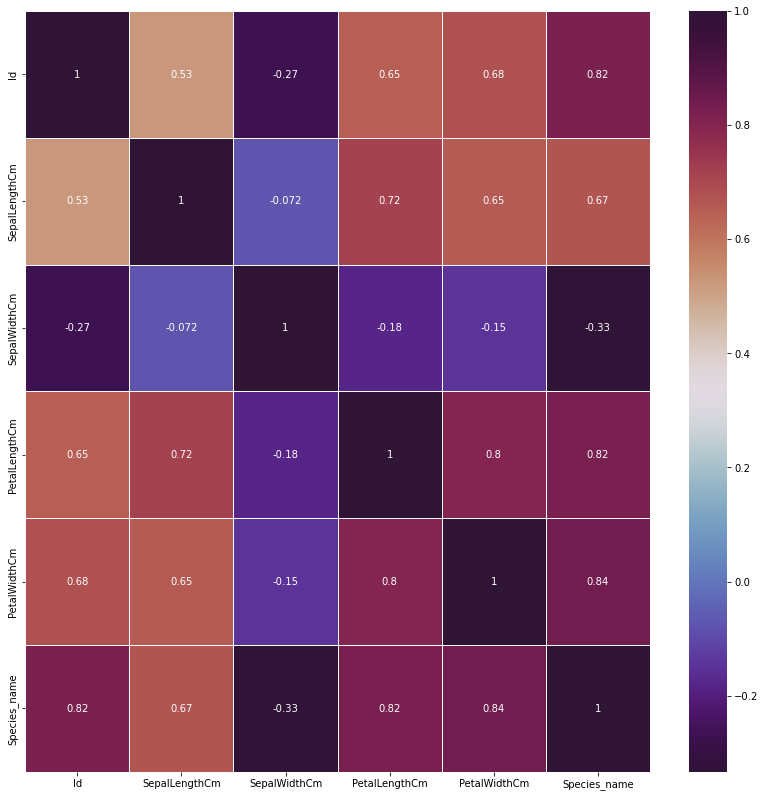

In [33]:
corr = iris.corr(method="kendall")
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, annot=True,linewidth=.5, ax=ax, cmap="twilight_shifted")


<AxesSubplot:>

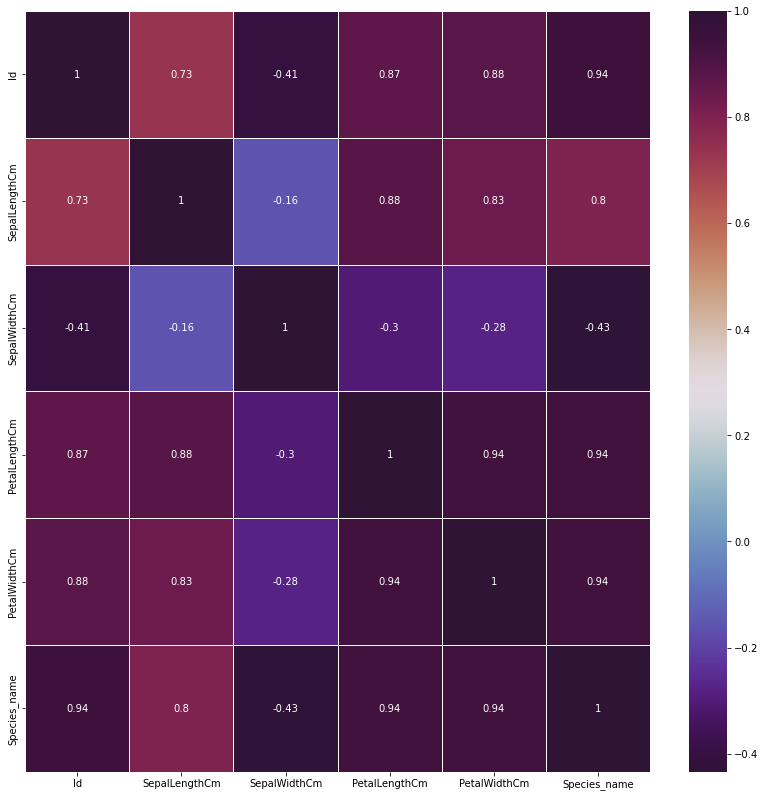

In [34]:
corr = iris.corr(method="spearman")
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, annot=True,linewidth=.5, ax=ax, cmap="twilight_shifted")



# MODEL TRAINING

In [35]:
x = iris.drop(columns=['Species'])
y = iris['Species']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35,random_state=1)

# LOGISTIC REGRESSION

In [37]:
log= LogisticRegression(solver="liblinear")
log.fit(x_train, y_train)
y_pred_lr = log.predict(x_test)
l_score=accuracy_score(y_test, y_pred_lr)
print("ACCURACY SCORE:",accuracy_score(y_test, y_pred_lr))
print("\n Confusion matrix\n",confusion_matrix(y_test,y_pred_lr))


ACCURACY SCORE: 0.9811320754716981

 Confusion matrix
 [[19  0  0]
 [ 0 18  1]
 [ 0  0 15]]


# KNN

In [38]:
classifier = KNeighborsClassifier(n_neighbors = 3,)
classifier.fit(x_train, y_train)
y_pred_knn = classifier.predict(x_test)
k_score=accuracy_score(y_test, y_pred_knn)
print("ACCURACY SCORE:",accuracy_score(y_test, y_pred_knn))
print("\n Confusion matrix\n",confusion_matrix(y_test,y_pred_knn))


ACCURACY SCORE: 0.9811320754716981

 Confusion matrix
 [[19  0  0]
 [ 0 18  1]
 [ 0  0 15]]


# DECISION TREE

In [39]:
dclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dclassifier.fit(x_train, y_train)
y_pred_dt = dclassifier.predict(x_test)
d_score=accuracy_score(y_test, y_pred_dt)
print("ACCURACY SCORE:",accuracy_score(y_test, y_pred_dt))
print("\n Confusion matrix\n",confusion_matrix(y_test,y_pred_dt))

ACCURACY SCORE: 0.9811320754716981

 Confusion matrix
 [[19  0  0]
 [ 0 18  1]
 [ 0  0 15]]


# RNDOM FOREST

In [40]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred_r = classifier.predict(x_test)
r_score=accuracy_score(y_test, y_pred_r)
print("ACCURACY SCORE:",accuracy_score(y_test, y_pred_r))
print("\n Confusion matrix\n",confusion_matrix(y_test,y_pred_r))


ACCURACY SCORE: 1.0

 Confusion matrix
 [[19  0  0]
 [ 0 19  0]
 [ 0  0 15]]


# CONFUSION MATRIC PLOT

In [41]:
cmatlr=confusion_matrix(y_test,y_pred_lr)
cmatknn=confusion_matrix(y_test,y_pred_knn)
cmatdt=confusion_matrix(y_test,y_pred_dt)
cmatr=confusion_matrix(y_test,y_pred_r)

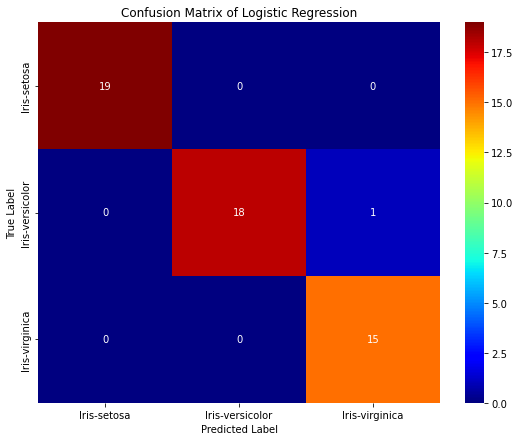

In [42]:
#Confusion Matrix of Logistic Regression
plt.figure(figsize=(9,7))
sns.heatmap(cmatlr,annot=True,fmt='d',cmap='jet', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

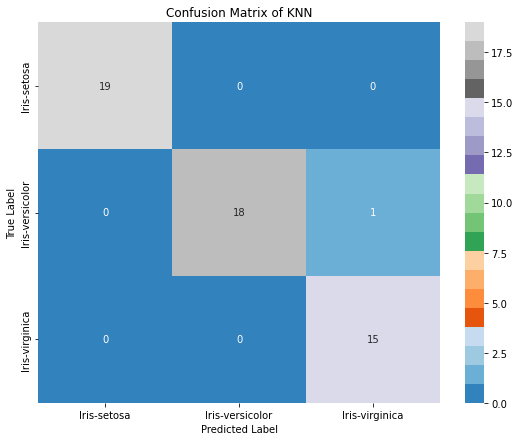

In [43]:
#Confusion Matrix of KNN
plt.figure(figsize=(9,7))
sns.heatmap(cmatknn,annot=True,fmt='d',cmap='tab20c', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()

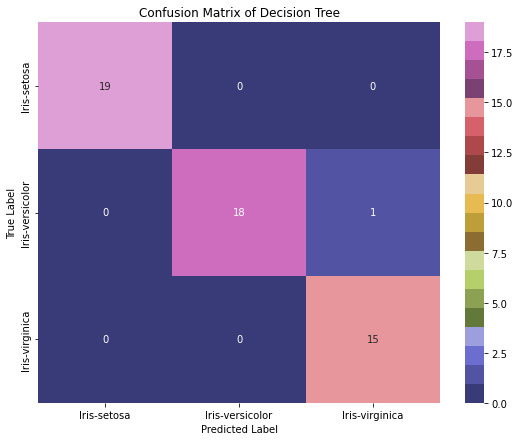

In [44]:
#Confusion Matrix of DECISION TREE
plt.figure(figsize=(9,7))
sns.heatmap(cmatdt,annot=True,fmt='d',cmap='tab20b', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

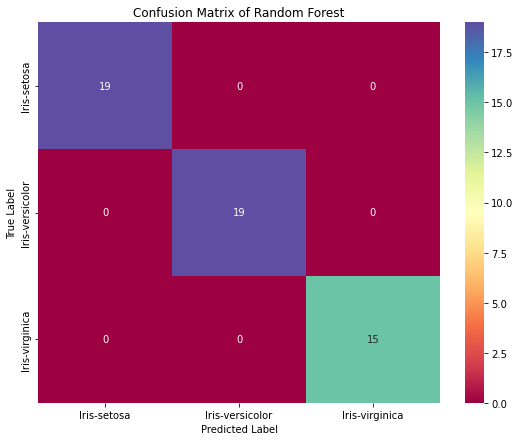

In [45]:
#Confusion Matrix of Random Forest
plt.figure(figsize=(9,7))
sns.heatmap(cmatr,annot=True,cmap='Spectral', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Random Forest')
plt.show()

# MODEL RESULT REPORT

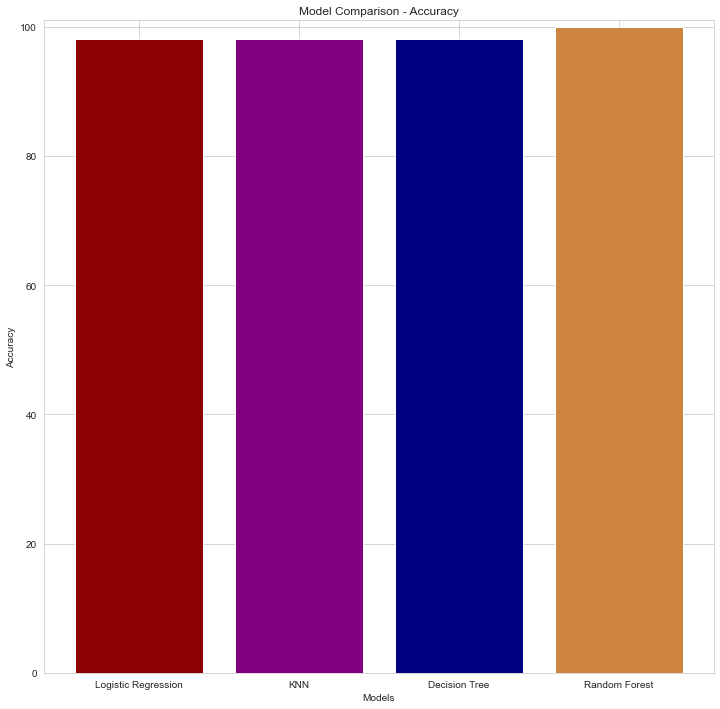

In [46]:
# Model Comparison - Visualization
sns.set_style("whitegrid")
plt.figure(figsize=(12,12))
models = ['Logistic Regression', 'KNN', 'Decision Tree','Random Forest']
accuracies = [l_score*100, k_score*100, d_score*100,r_score*100]
plt.bar(models, accuracies, color=['darkred', 'purple', 'navy','peru'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 101])
plt.show()

Therefore,Random Forest Classifier gives the accuracy of 100% and proves to be the best fit